# DRL Course 2023 Домашнее задание 3 #

Отчет по выполнению домашнего задания, Nikita Sorokin

## Задание 1 
В алгоритме Policy Iteration важным гиперпараметром является gamma. Требуется ответить на вопрос, какой gamma лучше выбирать. Качество обученной политики можно оценивать например запуская среду 1000 раз и взяв после этого средний total_reward. 

Описание алгоритма:

Введем две функции:

$$
v_\pi(s) := \mathbb{E}_\pi[G|S_0=s], \quad q_\pi(s, a) := \mathbb{E}_\pi[G|S_0=s, A_0=a]
$$

Для них можно записать уравнения Беллмана:

$$ 
v_\pi(s) = \sum_a \pi(a|s) \Big( R(s, a) + \gamma \sum_{s'} P(s' | s, a) v_\pi(s') \Big) \\[6pt]
q_\pi(s, a) = R(s, a) + \gamma \sum_{s'} P(s' | s, a) \sum_{a'} \pi(a'|s') q_\pi (s', a') \\[6pt]
$$

Из этих соотношений находится связь между функциями $ v_\pi(s) $ и $ q_\pi(s) $:

$$
v_\pi(s) = \sum_a \pi(a|s) q_\pi(s, a) \\[6pt]
q_\pi(s, a) = R(s, a) + \gamma \sum_{s'} P(s' | s, a)  v_\pi(s')
$$

В поставленной задачи награда зависит от следующего состояния поэтому полученная формула для $v_\pi(s) $ примут вид:

$$
q_\pi(s,a) = \sum_{s'} P(s'|s,a) \Big( R(s,a,s') + \gamma v_\pi (s')\Big)
$$

### Policy Iteration:

1. (Policy Evaluation) 
$$
v_{\pi}^{l + 1}(s) = \sum_a \pi(a|s) q_{\pi}^{l} (s, a), \quad l \in \overline{0, L-1} 
$$  

Находим $ q_{\pi}^{L}(s, a) $ по $ v_{\pi}^{L}(s) $

2. (Policy Improvement)

$$

\pi^{k + 1}(a|s) =

\begin{cases}
1, \text{if} \,\, a \in argmax_{a' \in A} q_{\pi}^{L} (s, a') \\
0, \text{else} \\
\end{cases}

$$

Посмотрим сколько итераций mean total reward от количества итераций алгоритма при фиксированных $ \gamma $ и $ \varepsilon $:

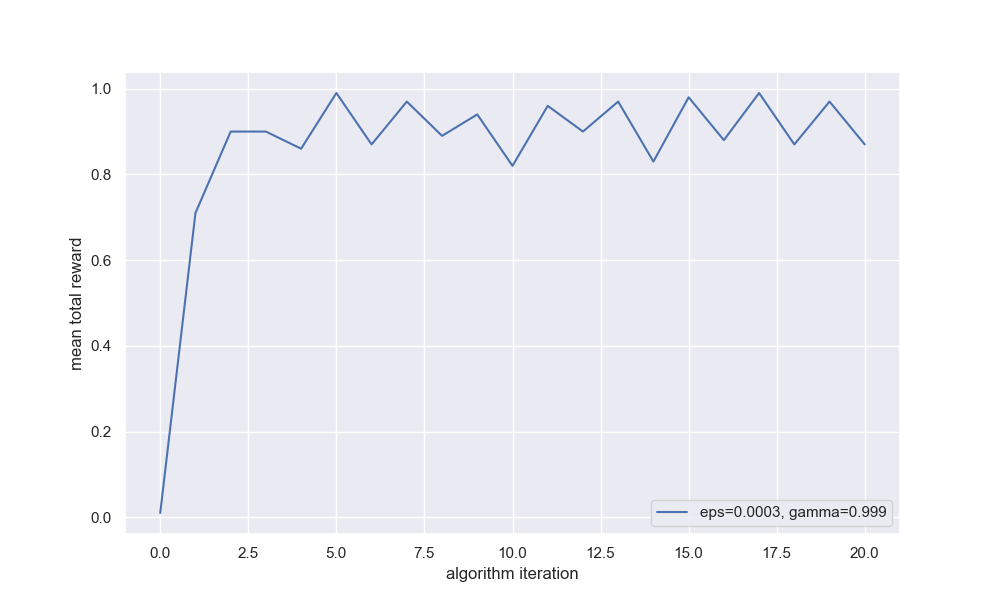

In [1]:
from IPython.display import display, Image
display(Image(filename="iter_n_search.png"))

Можно сделать вывод, что с примерно с третьей итерации алгоритм выходит на плато. Будем использовать iter_n = 5

С помощью grid-search будем искать наилучшие параметры $ \gamma $ и $ \varepsilon $:

Вывод:

```
gamma = 0.9,	 eps = 0.03: 	 mean_total_reward = 0.741   
gamma = 0.9,	 eps = 0.0003: 	 mean_total_reward = 0.714  
gamma = 0.9,	 eps = 3e-06: 	 mean_total_reward = 0.746  
gamma = 0.99,	 eps = 0.03: 	 mean_total_reward = 0.774  
gamma = 0.99,	 eps = 0.0003: 	 mean_total_reward = 0.874  
gamma = 0.99,	 eps = 3e-06: 	 mean_total_reward = 0.852  
gamma = 0.9999,	 eps = 0.03: 	 mean_total_reward = 0.754  
gamma = 0.9999,	 eps = 0.0003: 	 mean_total_reward = 0.996  
gamma = 0.9999,	 eps = 3e-06: 	 mean_total_reward = 0.999  
gamma = 1.0,	 eps = 0.03: 	 mean_total_reward = 0.756  
gamma = 1.0,	 eps = 0.0003: 	 mean_total_reward = 0.997  
gamma = 1.0,	 eps = 3e-06: 	 mean_total_reward = 0.994  
```

Следовательно, лучшие параметрами являются: $ \gamma = 0.9999 $ и $ \varepsilon = 0.000006 $

## Задание 2

На шаге Policy Evaluation мы каждый раз начинаем с нулевых values. А что будет если вместо этого начинать с values обученных на предыдущем шаге? Будет ли алгоритм работать? Если да, то будет ли он работать лучше? 

В функцию train добавим условие при выполнении которого v_values будут не обнуляться, а передаваться  в следующую итерациюк policy_evaluation.

Реализация:

```python
    def train(self, iter_n, eps, gamma, algo, save_v_values=False):

        ...

        for _ in range(iter_n):

            if save_v_values == False:
                v_values = self.init_v_values()

            q_values, v_values = self.policy_evaluation(policy, gamma, eps, v_values, algo)
            policy = self.policy_improvement(q_values)

        ...

        return policy
```

Вывод grid search'a для параметров $ \gamma $ и $ \varepsilon $:

```
gamma = 0.99,	 eps = 0.003, 	 save_v_values = False:	 mean_total_reward = 0.768
gamma = 0.99,	 eps = 0.003, 	 save_v_values = True: 	 mean_total_reward = 0.873 

gamma = 0.99,	 eps = 3e-06, 	 save_v_values = False:	 mean_total_reward = 0.852
gamma = 0.99,	 eps = 3e-06, 	 save_v_values = True: 	 mean_total_reward = 0.865 

gamma = 0.9999,	 eps = 0.003, 	 save_v_values = False:	 mean_total_reward = 0.974
gamma = 0.9999,	 eps = 0.003, 	 save_v_values = True: 	 mean_total_reward = 0.968 

gamma = 0.9999,	 eps = 3e-06, 	 save_v_values = False:	 mean_total_reward = 1.0
gamma = 0.9999,	 eps = 3e-06, 	 save_v_values = True: 	 mean_total_reward = 0.998
```

Можно подобрать такие значения $ \varepsilon $ и $ \gamma $, что mean_total_reward значительно больше у агента, который запоминает v_values. Однако в целом, в заданной среде различия не так существенны и даже подобрать такие значения довольно проблематично.

## Задание 3 

Написать Value Iteriation. Исследовать гиперпараметры (в том числе gamma). Cравнить с Policy Iteration. Поскольку в Policy Iteration есть еще внутренний цикл, то адекватным сравнением алгоритмов будет не графики их результативности относительно внешнего цикла, а графики относительно, например, количества обращения к среде. 

Определим 2 новые функции:

$$
v_{*}(s) = \underset{\pi}{max} \, v_{\pi}(s), \quad q_{*}(s, a) = \underset{\pi}{max} \, v_{\pi}(s, a)
$$

Связь между ними выводится из соответствующих уравнений Беллмана:

$$
v_{*}(s) = \underset{a \in A}{max} \, q_{*}(s, a), \quad q_{*}(s, a) = R(s, a) + \gamma \sum_{s'} P(s'|s, a) v_{*}(s')
$$

В алгоритме Value Iteration вычисляются функции $ v_{*}(s), \,\,  q_{*}(s, a) $ в то время как в алгоритме Policy Iteration вычисляются  $ v_{\pi}(s), \,\,  q_{\pi}(s, a) $. Так как формулы вычисления $ q(s,a) $ по $ v(s) $ совпадают в написанной реализации Policy Iteration надо только изменить формулу вычисления $ v(s) $ по $ q(s, a) $.

Реализация:

```python
    def policy_evaluation_step(self, v_values, policy, gamma, algo):

            ...

            if algo == 'policy':
                for action in self.env.get_possible_actions(state):
                    new_v_values[state] += policy[state][action] * q_values[state][action]
            if algo == 'value':
                try:
                    new_v_values[state] = max(q_values[state].values())
                except Exception:
                    new_v_values[state] = 0
```

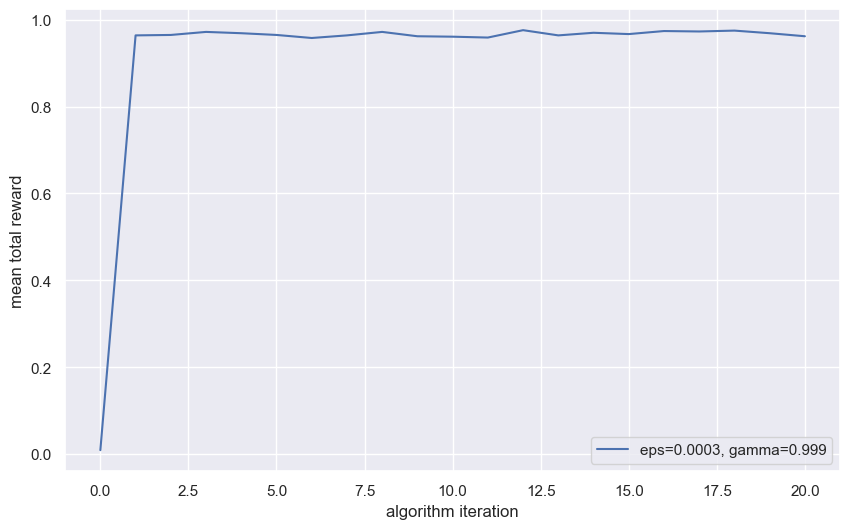

In [3]:
display(Image(filename="iter_n_search(g=0.999,eps=0.0003).png"))

Алгоритм сходится к оптимальной политики со второго шага. В дальнейшем будем рассматривать iter_n = 5. 

Вывод grid search'a для параметров $ \gamma $ и $ \varepsilon $:

```
gamma = 0.99,	 eps = 0.003, 	 algo = 'policy': mean_total_reward = 0.748
gamma = 0.99,	 eps = 0.003, 	 algo = 'value' : mean_total_reward = 0.831 

gamma = 0.99,	 eps = 3e-06, 	 algo = 'policy': mean_total_reward = 0.852
gamma = 0.99,	 eps = 3e-06, 	 algo = 'value' : mean_total_reward = 0.844 

gamma = 0.9999,	 eps = 0.003, 	 algo = 'policy': mean_total_reward = 0.959
gamma = 0.9999,	 eps = 0.003, 	 algo = 'value' : mean_total_reward = 0.862 

gamma = 0.9999,	 eps = 3e-06, 	 algo = 'policy': mean_total_reward = 1.0
gamma = 0.9999,	 eps = 3e-06, 	 algo = 'value' : mean_total_reward = 0.998 
```